In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('chicago_crimes.csv', parse_dates=['Date', 'Updated On'])

C:\Users\kalla\AppData\Local\Temp\ipykernel_19996\3077218383.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('chicago_crimes.csv', parse_dates=['Date', 'Updated On'])


In [3]:
# Define the date format
date_format = '%m/%d/%Y %I:%M:%S %p'

# Load the dataset with specified date format
df['Date'] = pd.to_datetime(df['Date'], format=date_format)
df['Updated On'] = pd.to_datetime(df['Updated On'], format=date_format)

In [4]:
# Drop columns that are not needed for analysis
columns_to_remove = ['ID', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Location']
df.drop(columns=columns_to_remove, inplace=True)

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Block                 object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Community Area        float64       
 11  FBI Code              object        
 12  Year                  int64         
 13  Updated On            datetime64[ns]
 14  Latitude              float64       
 15  Longitude             float64       
dtypes: bool(2), datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 878.1+ MB
None


In [6]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
0,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,2007,2015-08-17 15:03:40,NaN,NaN
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,2021,2023-11-18 15:39:49,41.917838,-87.755969
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,2021,2023-11-18 15:39:49,41.995219,-87.713355
3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,2023,2023-11-18 15:39:49,41.952345,-87.677975
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,2023,2023-12-09 15:41:24,41.737751,-87.604856


In [7]:
df.isna().sum()

Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
dtype: int64

In [5]:
# Fill missing values
# 1. Location Description: Fill with mode
df['Location Description'] = df['Location Description'].fillna(df['Location Description'].mode()[0])

# 2. District: Fill with mode
df['District'] = df['District'].fillna(df['District'].mode()[0])

# 3. Ward: Fill with mode
df['Ward'] = df['Ward'].fillna(df['Ward'].mode()[0])

# 4. Community Area: Fill with mode
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])

# 5. Latitude and Longitude: Fill with mean
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

# Verify the missing values are handled
print(df.isna().sum())


Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64


In [10]:
df['Block'] = df['Block'].astype('string')
df['Primary Type'] = df['Primary Type'].astype('string')
df['Description'] = df['Description'].astype('string')
df['Location Description'] = df['Location Description'].astype('string')
df['Arrest'] = df['Arrest'].astype(bool)
df['Domestic'] = df['Domestic'].astype(bool)
df['Beat'] = df['Beat'].astype('int64')
df['District'] = df['District'].astype('int64')
df['Ward'] = df['Ward'].astype('int64')
df['Community Area'] = df['Community Area'].astype('int64')
df['FBI Code'] = df['FBI Code'].astype('string')
df['Year'] = df['Year'].astype('int64')
df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')

In [17]:
# Identify columns with unique values
unique_columns = [col for col in df.columns if df[col].nunique() == df.shape[0]]
unique_columns

[]

In [19]:
# Count of total crime incidents
total_crime_count = df.shape[0]
print("Total Crime Incidents:", total_crime_count)

Total Crime Incidents: 8077151


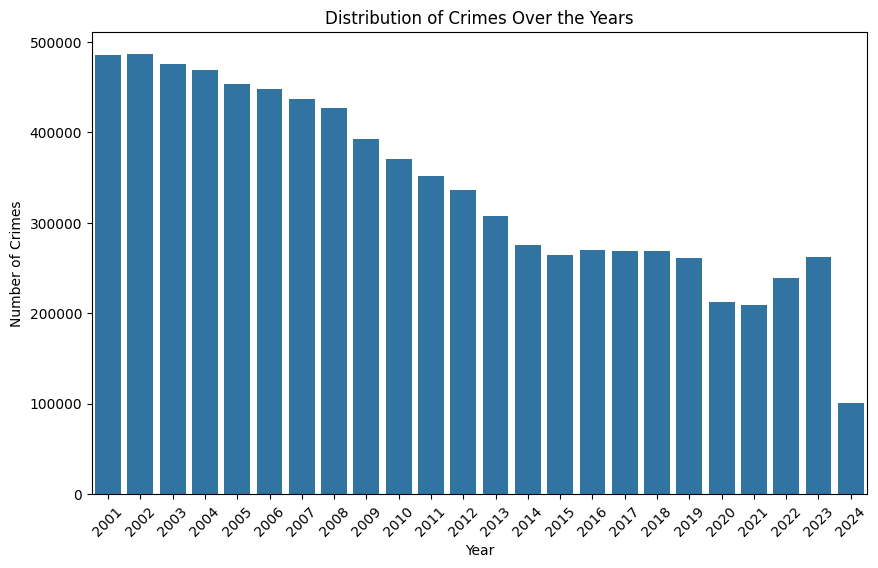

In [20]:
# Distribution of crimes over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

Top 10 Most Common Types of Crimes:
Primary Type
THEFT                  1706621
BATTERY                1473440
CRIMINAL DAMAGE         920174
NARCOTICS               753859
ASSAULT                 533135
OTHER OFFENSE           501905
BURGLARY                432699
MOTOR VEHICLE THEFT     404639
DECEPTIVE PRACTICE      364844
ROBBERY                 304347
Name: count, dtype: int64


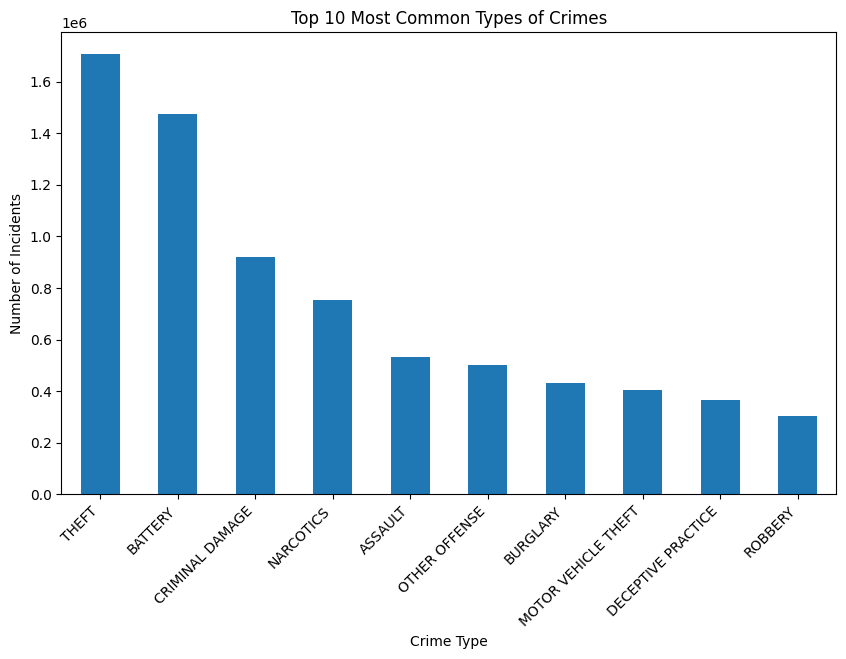

In [21]:
# Most common types of crimes
top_crime_types = df['Primary Type'].value_counts().head(10)
print("Top 10 Most Common Types of Crimes:")
print(top_crime_types)

plt.figure(figsize=(10, 6))
top_crime_types.plot(kind='bar')
plt.title('Top 10 Most Common Types of Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

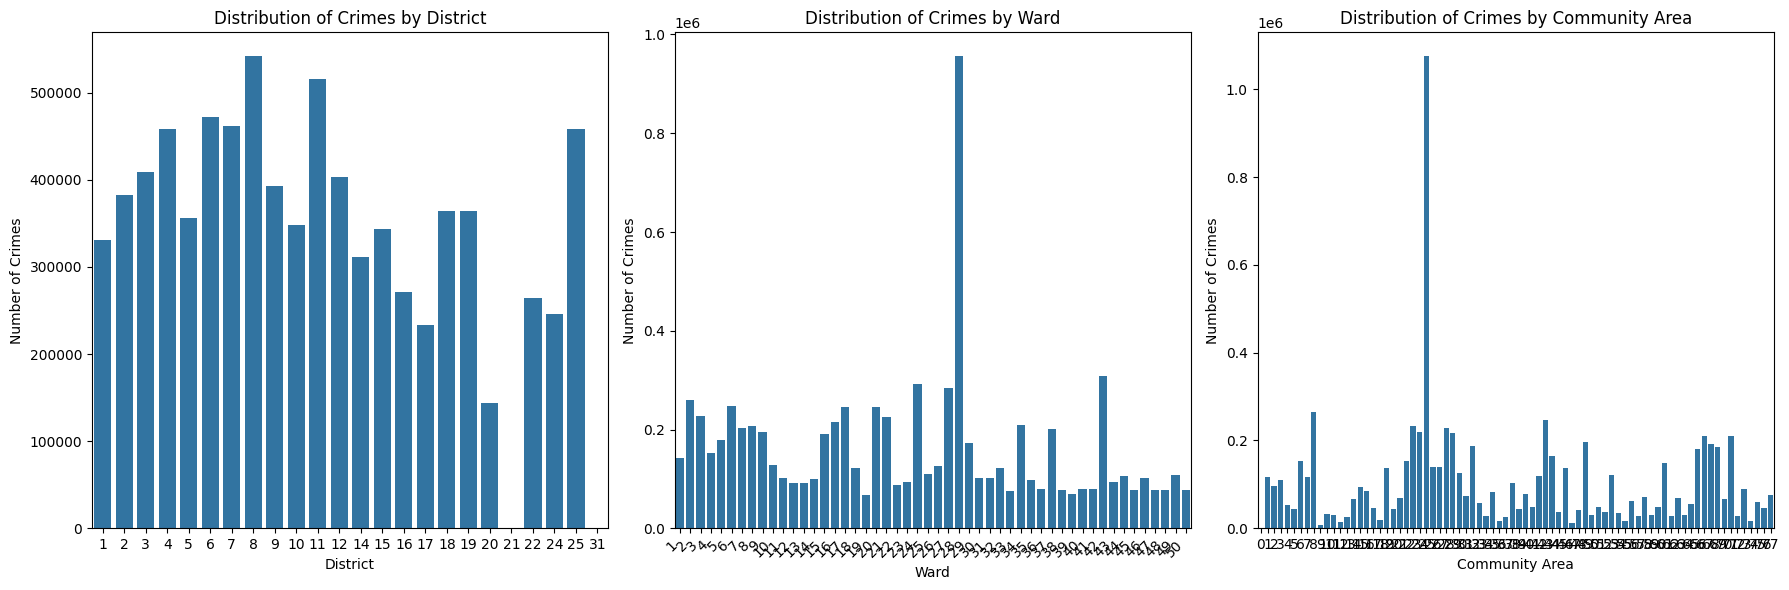

In [23]:
# Distribution of crimes by location (districts, wards, community areas)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='District', data=df)
plt.title('Distribution of Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

plt.subplot(1, 3, 2)
sns.countplot(x='Ward', data=df)
plt.title('Distribution of Crimes by Ward')
plt.xlabel('Ward')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Number of Crimes')

plt.subplot(1, 3, 3)
sns.countplot(x='Community Area', data=df)
plt.title('Distribution of Crimes by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

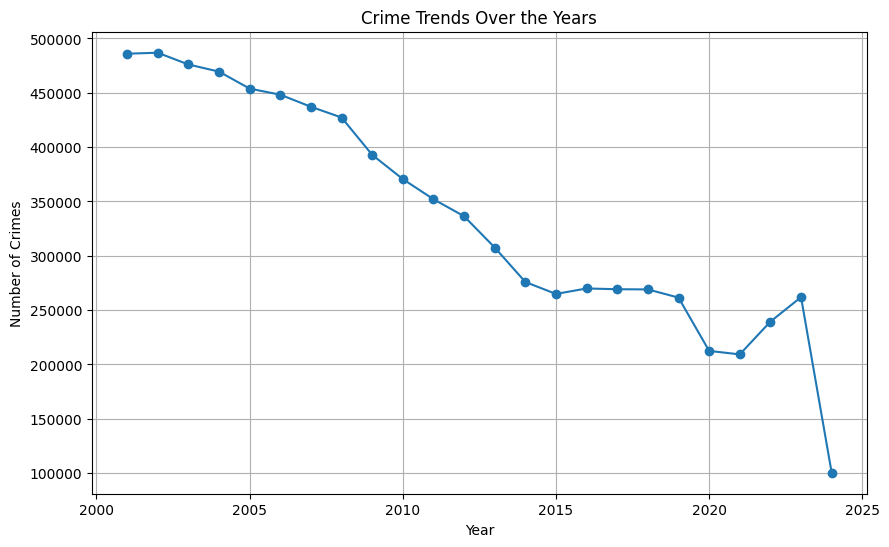

In [8]:
import matplotlib.pyplot as plt

# Group data by year and count the number of crimes
crime_trends = df.groupby(df['Date'].dt.year).size()

# Plot crime trends over the years
plt.figure(figsize=(10, 6))
crime_trends.plot(kind='line', marker='o')
plt.title('Crime Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

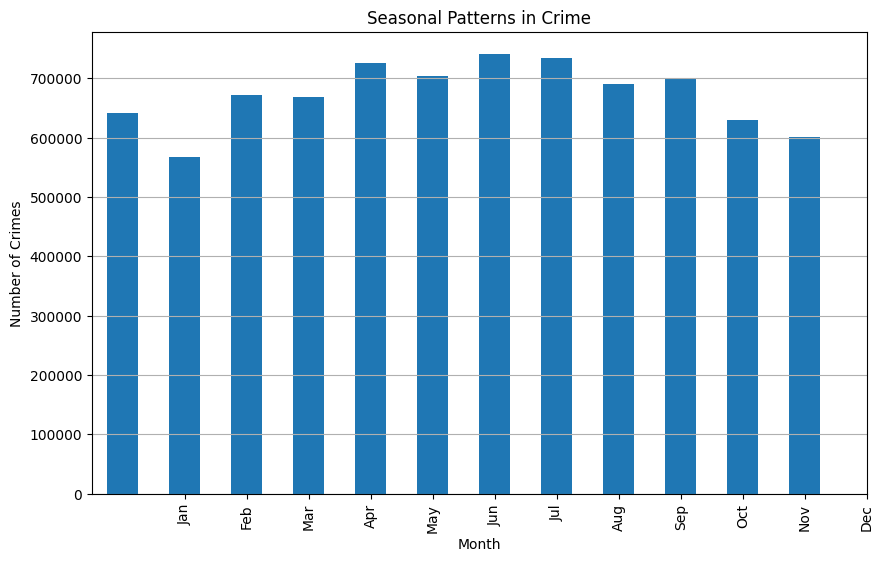

In [9]:
# Group data by month and count the number of crimes
crime_seasonal_patterns = df.groupby(df['Date'].dt.month).size()

# Plot seasonal patterns in crime
plt.figure(figsize=(10, 6))
crime_seasonal_patterns.plot(kind='bar')
plt.title('Seasonal Patterns in Crime')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

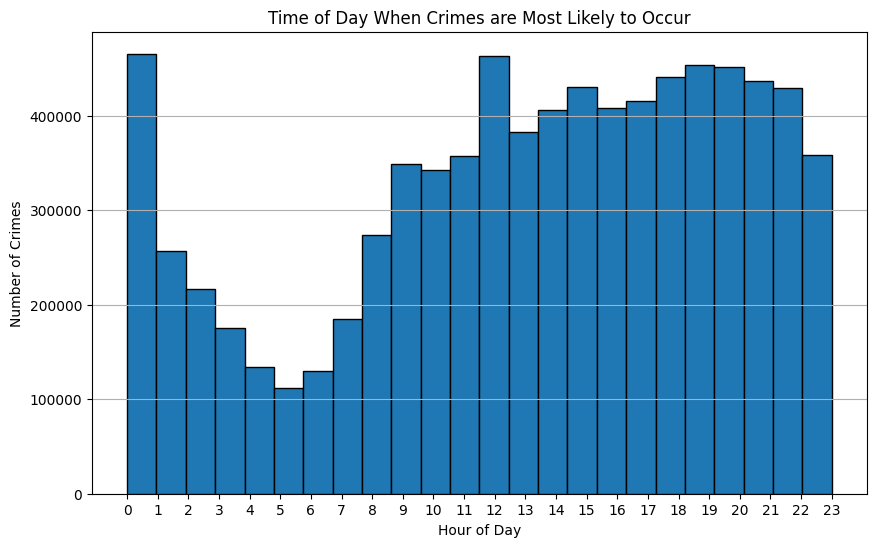

In [10]:
# Extract hour from the datetime column
df['Hour'] = df['Date'].dt.hour

# Plot time of day when crimes are most likely to occur
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, edgecolor='black')
plt.title('Time of Day When Crimes are Most Likely to Occur')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

C:\Users\kalla\AppData\Local\Temp\ipykernel_8744\1649181645.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrest_rates = df.groupby('Primary Type')['Arrest'].mean().sort_values()


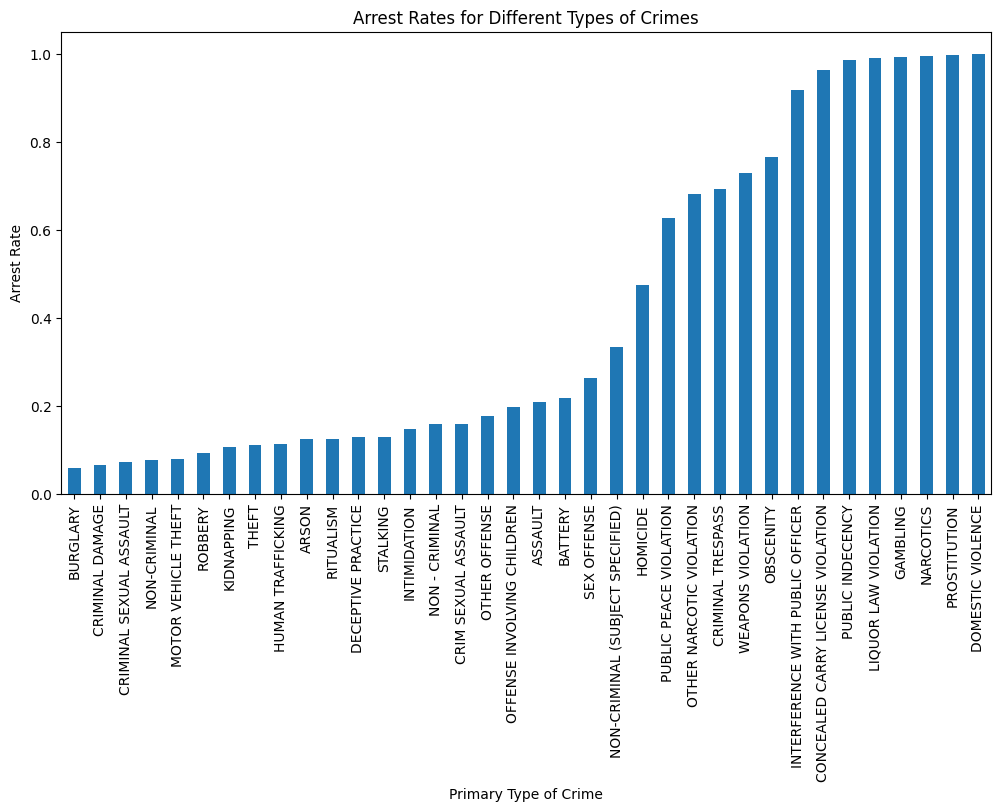

In [18]:
import matplotlib.pyplot as plt

# Calculate arrest rates for different types of crimes
arrest_rates = df.groupby('Primary Type')['Arrest'].mean().sort_values()

# Plot arrest rates for different types of crimes
plt.figure(figsize=(12, 6))
arrest_rates.plot(kind='bar')
plt.title('Arrest Rates for Different Types of Crimes')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=90)
plt.show()

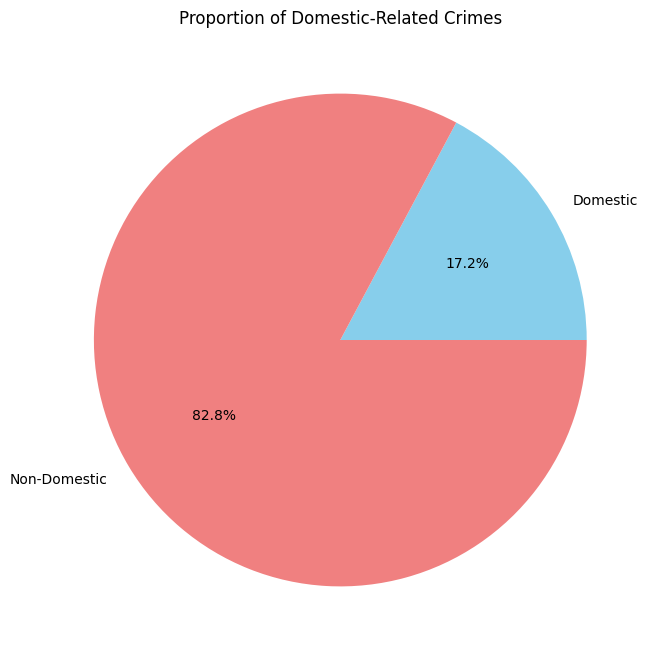

In [19]:
# Calculate proportion of domestic-related crimes
domestic_proportion = df['Domestic'].mean()

# Plot proportion of domestic-related crimes
plt.figure(figsize=(8, 8))
plt.pie([domestic_proportion, 1 - domestic_proportion], labels=['Domestic', 'Non-Domestic'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Domestic-Related Crimes')
plt.show()

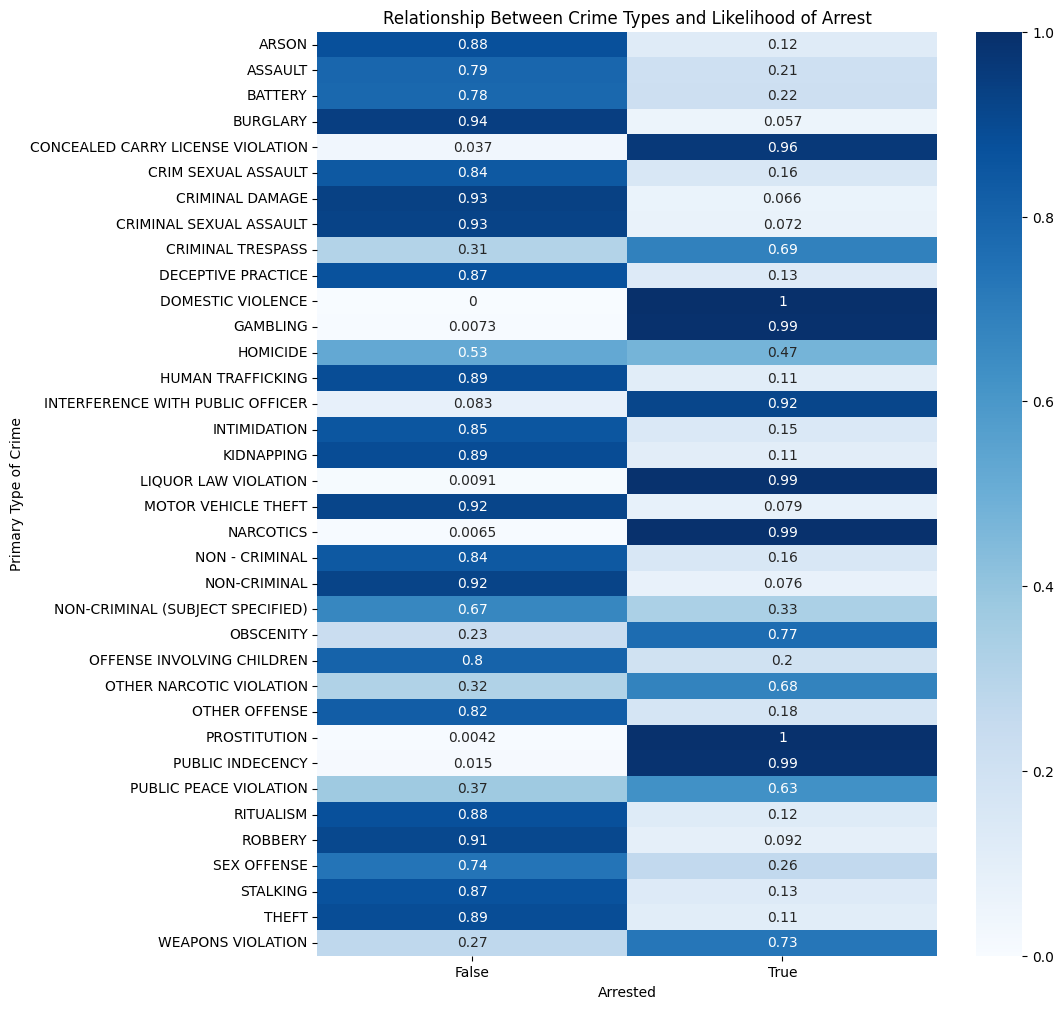

In [20]:
import pandas as pd

# Create a contingency table of crime types and arrest status
contingency_table = pd.crosstab(df['Primary Type'], df['Arrest'], normalize='index')

# Plot the contingency table as a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Relationship Between Crime Types and Likelihood of Arrest')
plt.xlabel('Arrested')
plt.ylabel('Primary Type of Crime')
plt.show()

**Anticipating Crime Trends using Predictive Modeling**

In [ ]:
# Assuming 'Date' is the datetime column in your DataFrame
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Primary Type','Arrest','Domestic']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Latitude,Longitude,Date,Arrest,Domestic,Hour,DayOfWeek,Month,Primary Type
0,41.842357,-87.671419,2007-08-25 09:22:18,0,0,9,5,8,1
1,41.917838,-87.755969,2021-05-24 15:06:00,1,0,15,0,5,12
2,41.995219,-87.713355,2021-06-26 09:24:00,1,0,9,5,6,12
3,41.952345,-87.677975,2023-11-09 07:30:00,0,0,7,3,11,3
4,41.737751,-87.604856,2023-11-12 07:59:00,1,0,7,6,11,2
...,...,...,...,...,...,...,...,...,...
8077146,41.887589,-87.642827,2023-04-18 08:00:00,0,0,8,1,4,9
8077147,41.721698,-87.625345,2023-08-07 18:00:00,0,0,18,0,8,31
8077148,41.836324,-87.720674,2023-06-20 19:00:00,0,0,19,1,6,18
8077149,41.752631,-87.548737,2023-08-26 00:00:00,0,0,0,5,8,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Select features for modeling
features = ['Year', 'Month', 'Hour', 'DayOfWeek', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude']
X = df[features]
y = df['Primary Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Plot the confusion matrix for more detailed analysis
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()